<a href="https://colab.research.google.com/github/mayait/ClaseMachineLearning/blob/main/Logistic_regression_model_and_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logistica y ROC

In [1]:
# importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importar modelo de regresión logística y funciones de evaluación de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.cm as cm
from sklearn import metrics

# importar funciones de división de datos y mapa de colores personalizados
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import seaborn as sns

# establecer la resolución de la figura de matplotlib
plt.rcParams['figure.dpi'] = 90


## Regresión logistica 

La regresión logística es un modelo utilizado para predecir la probabilidad de que algo pertenezca a una de dos clases. Por ejemplo, imagina que queremos predecir si un ratón será obeso o no. Podemos usar la regresión logística para predecir la probabilidad de que un correo electrónico sea spam. La regresión logística se basa en una función matemática llamada función logística que toma un valor de entrada y produce un valor de salida en el rango de 0 a 1. La salida representa la probabilidad de que el ratón sea gordo.


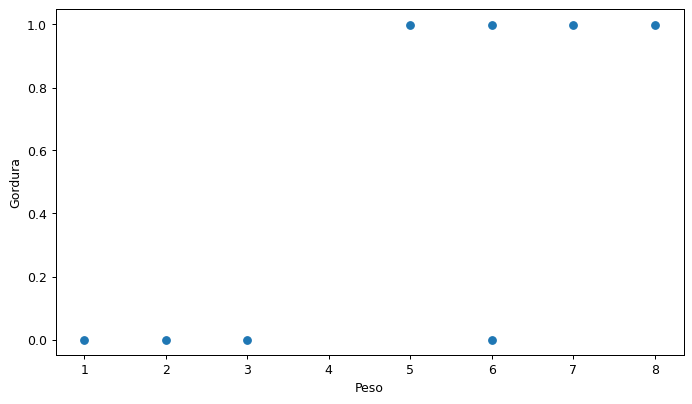

In [2]:
# generamos datos aleatorios de ejemplo
np.random.seed(0)
n_samples = 100
data = pd.DataFrame({'peso':    [2, 1, 3, 6, 5, 6, 7, 8,],
                     'gordura': [0, 0, 0, 0, 1, 1, 1, 1,]})

# fit the logistic regression model
X = data[['peso']]
y = data['gordura']

# creamos un gráfico de dispersión
plt.figure(figsize=(9, 5))
plt.scatter(data.peso, data.gordura,)
plt.xlabel('Peso')
plt.ylabel('Gordura')
plt.show()

In [3]:
# Instanciar el modelo
model = LogisticRegression()
model.fit(X, y)

# Ajustamos el modelo
y_pred = model.predict(X)

/Users/julianmaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


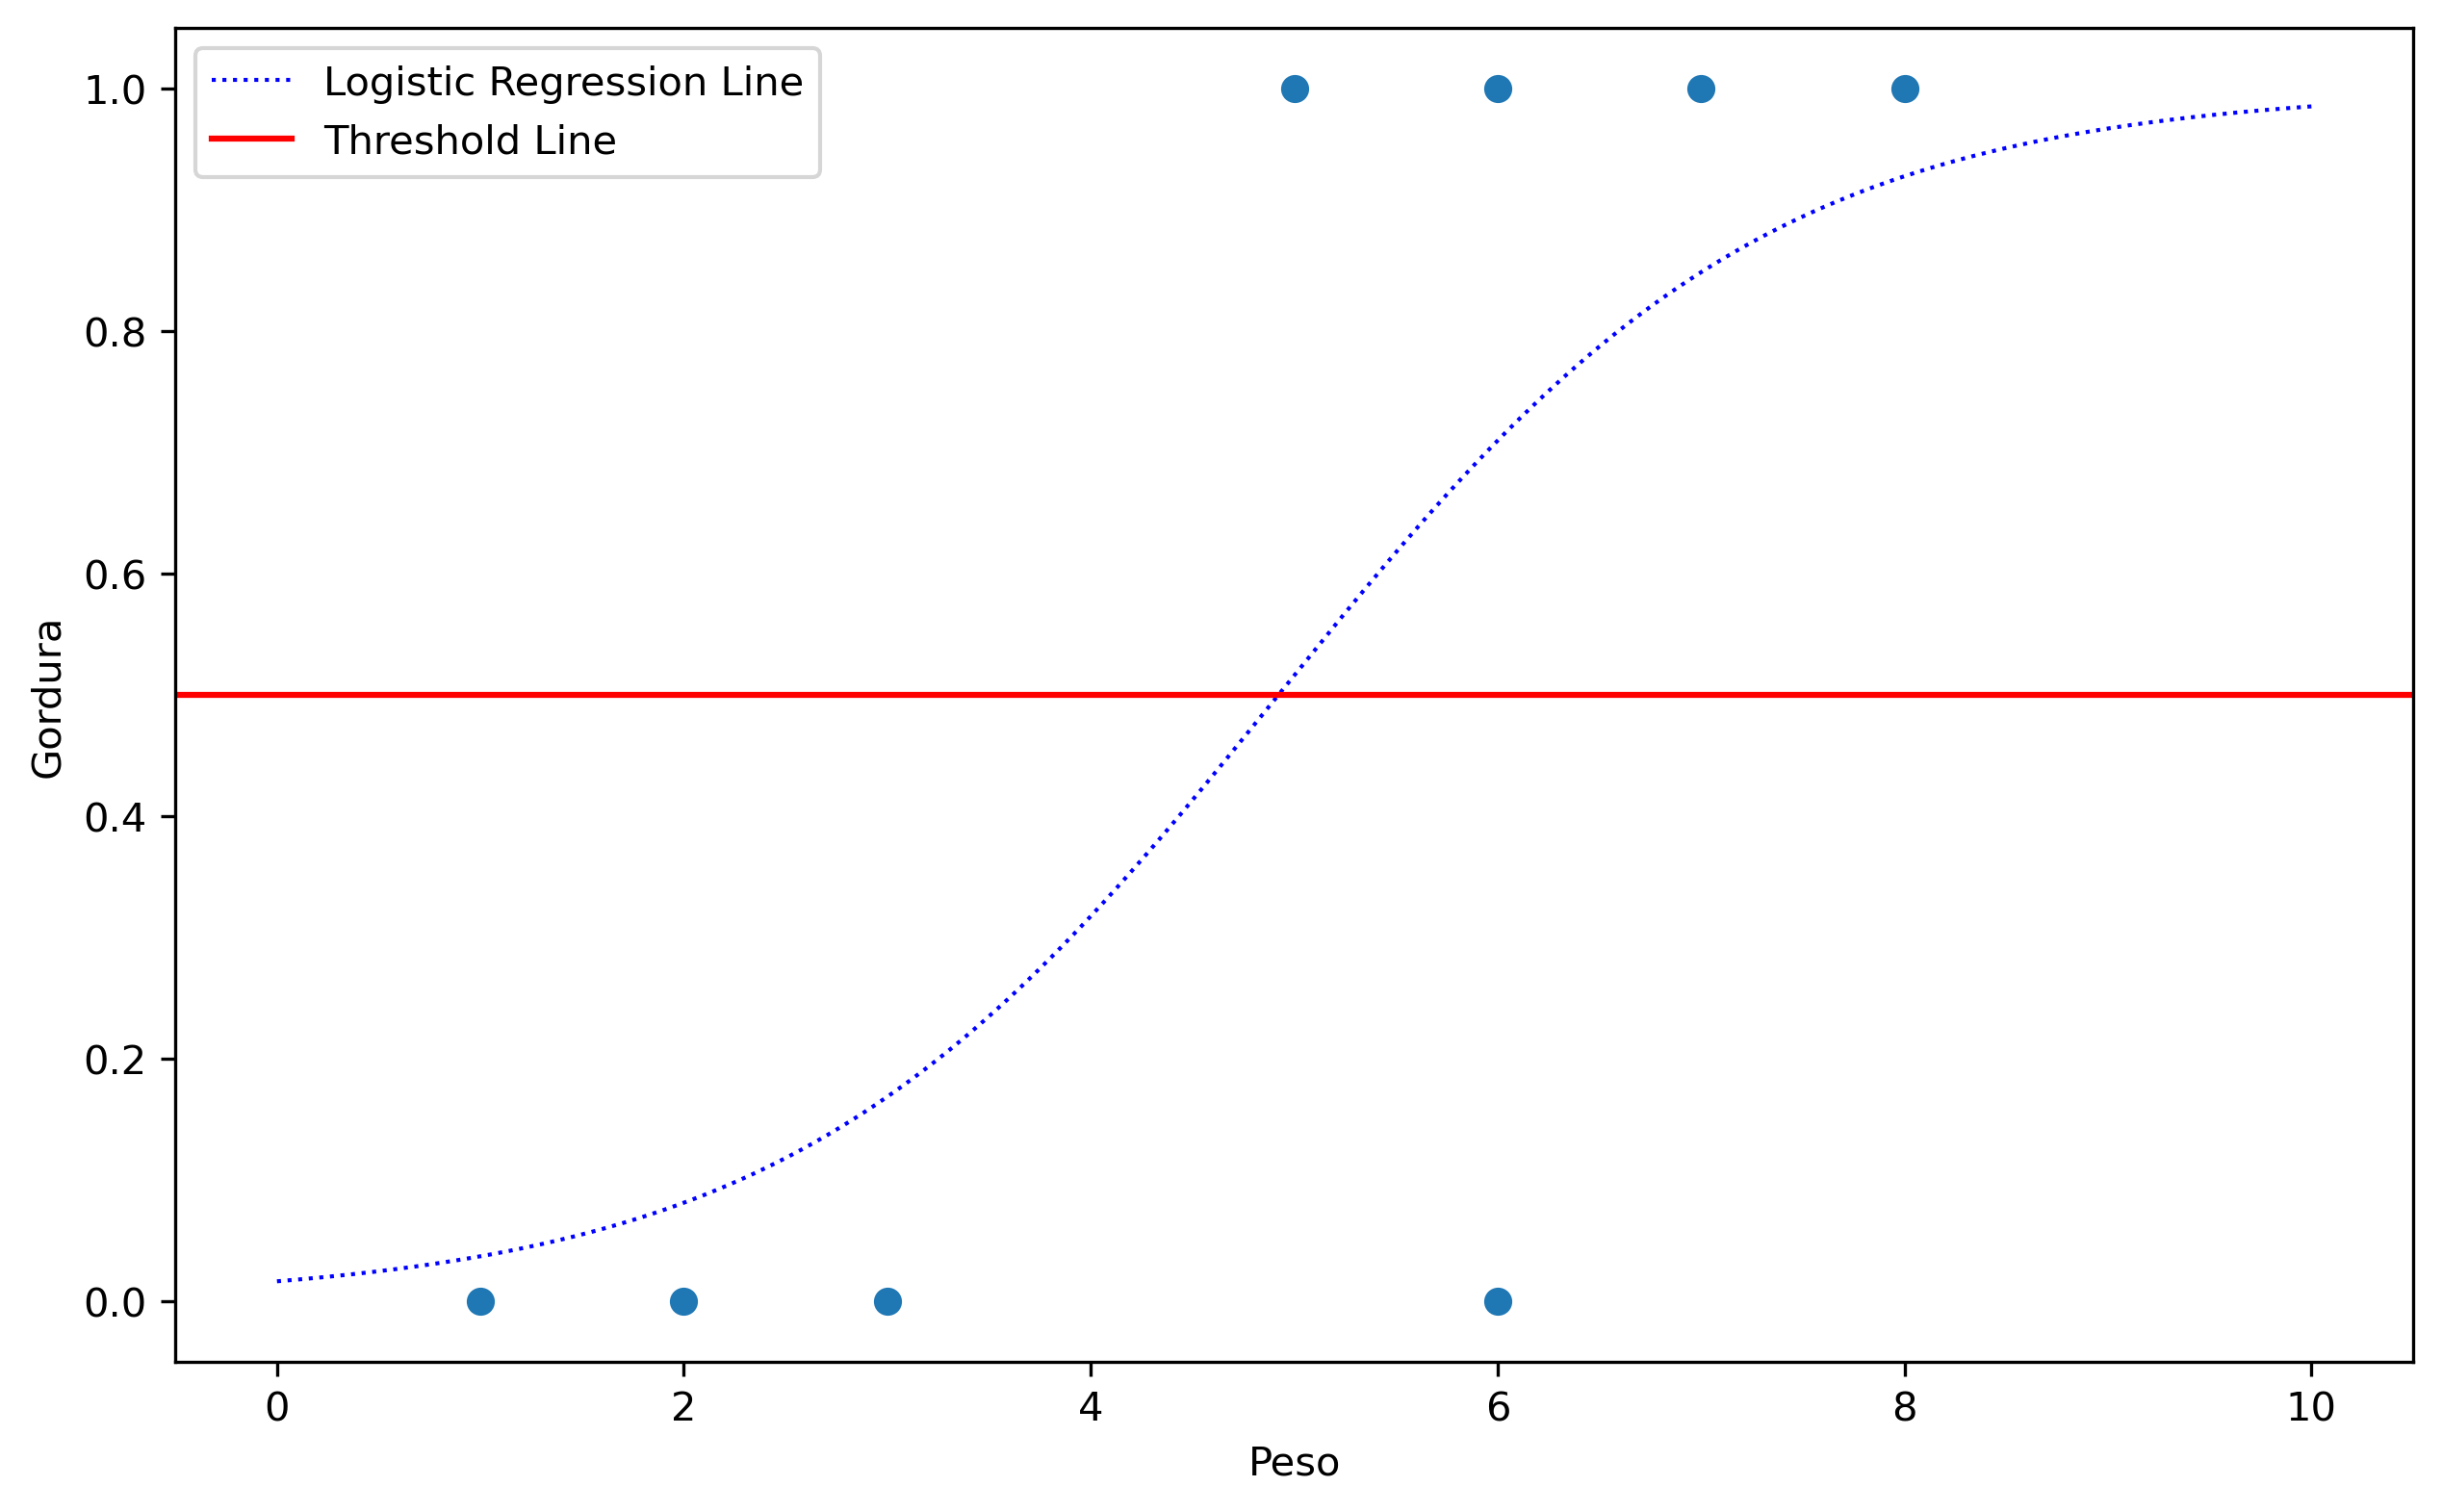

In [4]:
#@title Logreg
# plot the logistic curve
# create a figure with a larger size
fig = plt.figure(figsize=(10, 6), dpi=300)
X_line = np.linspace(0, 10, 1000)
y_line = model.predict_proba(X_line.reshape(-1,1))[:, 1]
plt.plot(X_line, y_line, color='blue', linewidth=1,linestyle=':', label='Logistic Regression Line')

plt.scatter(data['peso'], data['gordura'])

# plot the threshold line
threshold = 0.5
plt.axhline(y=threshold, color='red', linestyle='-', label='Threshold Line')

plt.legend(loc='best')
plt.xlabel('Peso')
plt.ylabel('Gordura')
plt.show()  

## Matriz de confusión

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels = ['No', 'Si']):
    """
    Grafica una matriz de confusión basada en las etiquetas verdaderas y predichas.
    """

    # calculate the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    

    # calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    fpr = fp / (fp + tn)

    # define a custom colormap
    cmap = plt.cm.get_cmap('Greens', 2)

    # get the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
  

    # plot the confusion matrix with the custom colormap
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig = plt.figure(figsize=(4, 4))
    disp.plot(cmap=cmap)
    

    plt.show()

    

    print('tn', tn,'fp', fp)
    print('fn', fn,'tp', tp)

    print('Sensitivity / Recall / TPR:', sensitivity)
    print('Specificity / selectivity / TNR:', specificity)
    print('Fallout / FPR:', precision)
    print('Precision / Positive predicted value:', fpr)

<Figure size 360x360 with 0 Axes>

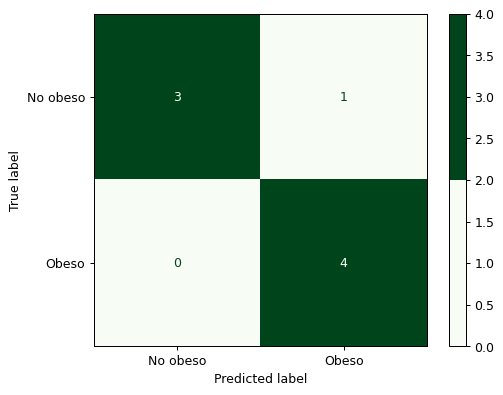

tn 3 fp 1
fn 0 tp 4
Sensitivity / Recall / TPR: 1.0
Specificity / selectivity / TNR: 0.75
Fallout / FPR: 0.8
Precision / Positive predicted value: 0.25


In [6]:
plot_confusion_matrix(y, y_pred, ['No obeso', 'Obeso'])

## Curva ROC (Receiver Operating Characteristic) 
Esta curva representa la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a medida que se varía el umbral de decisión del modelo. 

En otras palabras, la curva ROC muestra cómo cambia la capacidad de un modelo para clasificar correctamente los casos positivos y negativos a medida que se mueve el umbral de decisión.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/13/Roc_curve.svg" alt="ROC" width="500" height="500">


In [7]:
!wget -nv https://github.com/mayait/ClaseAnalisisDatos/raw/main/machine_learning/datasets/diabetes_clean.csv

2023-03-02 13:01:21 URL:https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/machine_learning/datasets/diabetes_clean.csv [23075/23075] -> "diabetes_clean.csv.2" [1]


## 🌶️🌶️🌶️ Ejercicio

Utiliza el dataset de diabetes

In [8]:
diabetes_df = pd.read_csv('diabetes_clean.csv')

In [9]:
X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predecimos Y_PRED
y_pred = logreg.predict(X_test)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]


print(y_pred_probs[:10])

[0.62638742 0.10496256 0.26881307 0.28955807 0.00400804 0.18875206
 0.46256689 0.92923524 0.10089097 0.78407693]


/Users/julianmaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Observa cómo la probabilidad de un diagnóstico de diabetes para los primeros 10 individuos en el conjunto de pruebas varía de 0,01 a 0,79. Ahora, grafiquemos la curva ROC para visualizar el rendimiento utilizando diferentes umbrales

<Figure size 360x360 with 0 Axes>

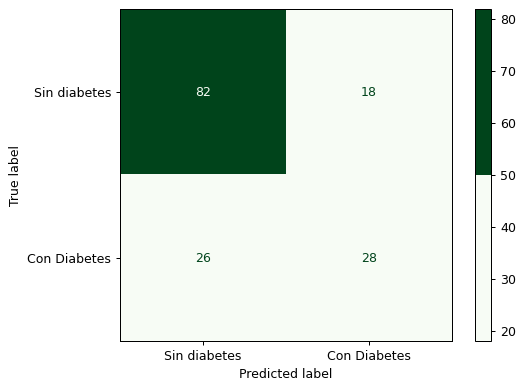

tn 82 fp 18
fn 26 tp 28
Sensitivity / Recall / TPR: 0.5185185185185185
Specificity / selectivity / TNR: 0.82
Fallout / FPR: 0.6086956521739131
Precision / Positive predicted value: 0.18


In [10]:
plot_confusion_matrix(y_test, y_pred, ['Sin diabetes', 'Con Diabetes'])

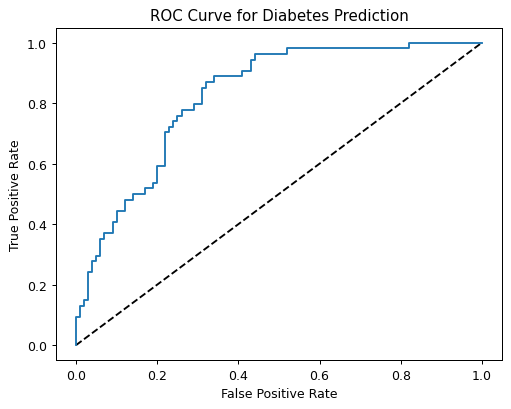

In [11]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

## 🌶️ ¿Qué te dice la gráfica sobre el rendimiento del modelo?


A. El modelo es casi tan bueno como adivinar aleatoriamente la clase de cada observación.

B. El modelo es mucho peor que adivinar aleatoriamente la clase de cada observación.

C. El modelo es mucho mejor que adivinar aleatoriamente la clase de cada observación.

D. No es posible concluir si el modelo funciona mejor o peor que adivinar aleatoriamente la clase de cada observación.

# AUC / Área bajo la curva
El AUC representa el área bajo la curva ROC y, mide la capacidad del modelo para distinguir entre casos positivos y negativos.

El AUC oscila entre 0 y 1

- 1 indica un modelo perfecto que es capaz de clasificar correctamente todos los casos positivos y negativos
- 0,5 indica un modelo que es tan bueno como adivinar al azar la clase de cada observación

<Figure size 360x360 with 0 Axes>

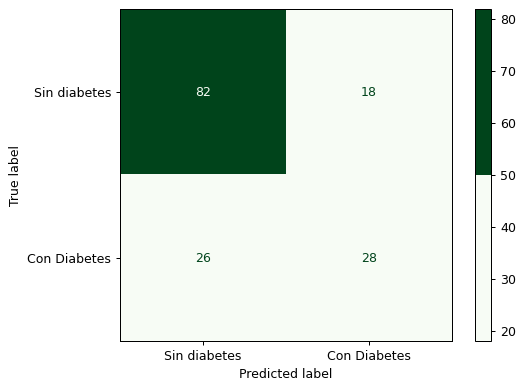

tn 82 fp 18
fn 26 tp 28
Sensitivity / Recall / TPR: 0.5185185185185185
Specificity / selectivity / TNR: 0.82
Fallout / FPR: 0.6086956521739131
Precision / Positive predicted value: 0.18
AUC Score:  0.8237037037037037
Un area bajo ROC de 82.0% significa que este modelo es 32.0% mejor que adivinar con una ruleta


In [12]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate the confusion matrix
plot_confusion_matrix(y_test, y_pred, ['Sin diabetes', 'Con Diabetes'])

# Calculate the classification report
# print(classification_report(y_test, y_pred))

# Calculate roc_auc_score
auc = roc_auc_score(y_test, y_pred_probs)
print('AUC Score: ',auc)
print('Un area bajo ROC de {}% significa que este modelo es {}% mejor que adivinar con una ruleta'.format(round(auc*100, 0), round(auc*100-50, 0) ))



## 🌶️ Comparemos los resultados de el mismo ejercicio evaluado con KNN


[[87 13]
 [31 23]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.64      0.43      0.51        54

    accuracy                           0.71       154
   macro avg       0.69      0.65      0.65       154
weighted avg       0.70      0.71      0.70       154



/Users/julianmaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<Figure size 360x360 with 0 Axes>

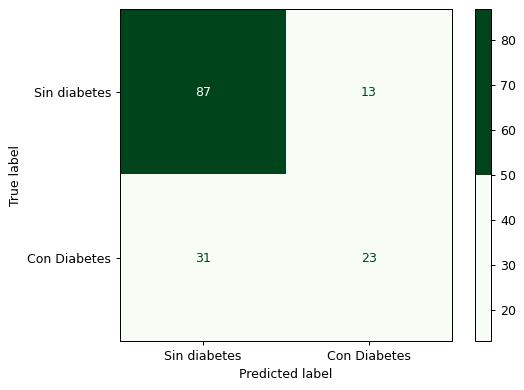

tn 87 fp 13
fn 31 tp 23
Sensitivity / Recall / TPR: 0.42592592592592593
Specificity / selectivity / TNR: 0.87
Fallout / FPR: 0.6388888888888888
Precision / Positive predicted value: 0.13
AUC Score:  0.7250000000000001
Un area bajo ROC de 73.0% significa que este modelo es 23.0% mejor que adivinar con una ruleta


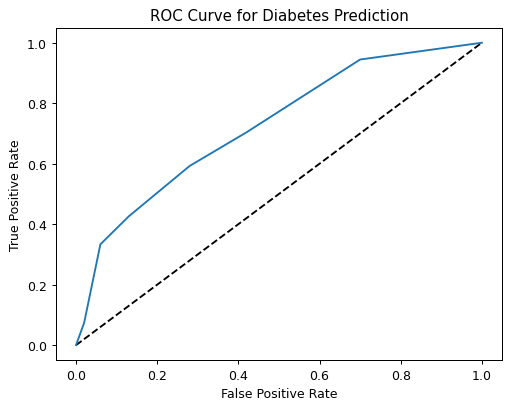

In [13]:
# Solución
# Importar matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

# Ajustar el modelo a los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecir las etiquetas de los datos de prueba: y_pred
y_pred = knn.predict(X_test)
# predict probabilities for test set
y_pred_probs = knn.predict_proba(X_test)[:, 1]
# Generar la matriz de confusión y el informe de clasificación
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate the confusion matrix
plot_confusion_matrix(y_test, y_pred, ['Sin diabetes', 'Con Diabetes'])

# Calculate the classification report
# print(classification_report(y_test, y_pred))

# Calculate roc_auc_score
auc = roc_auc_score(y_test, y_pred_probs)
print('AUC Score: ',auc)
print('Un area bajo ROC de {}% significa que este modelo es {}% mejor que adivinar con una ruleta'.format(round(auc*100, 0), round(auc*100-50, 0) ))

# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()